In [ ]:
from pydub.utils import mediainfo
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
filename = "/content/audio_sample.mp4"
audio_sample = mediainfo(filename)
sample_rate = int(audio_sample['sample_rate'])
y, sr = librosa.load(filename, sr=sample_rate)
duration = librosa.get_duration(y=y, sr=sr)
print(f"Sample rate of the audio file: {sample_rate} Hz")
print(f"The duration of the audio file is {duration:.2f} seconds.")

<ipython-input-3-5999d4798767>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sample rate of the audio file: 48000 Hz
The duration of the audio file is 3.75 seconds.


<ipython-input-6-a0a1a42f09f1>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


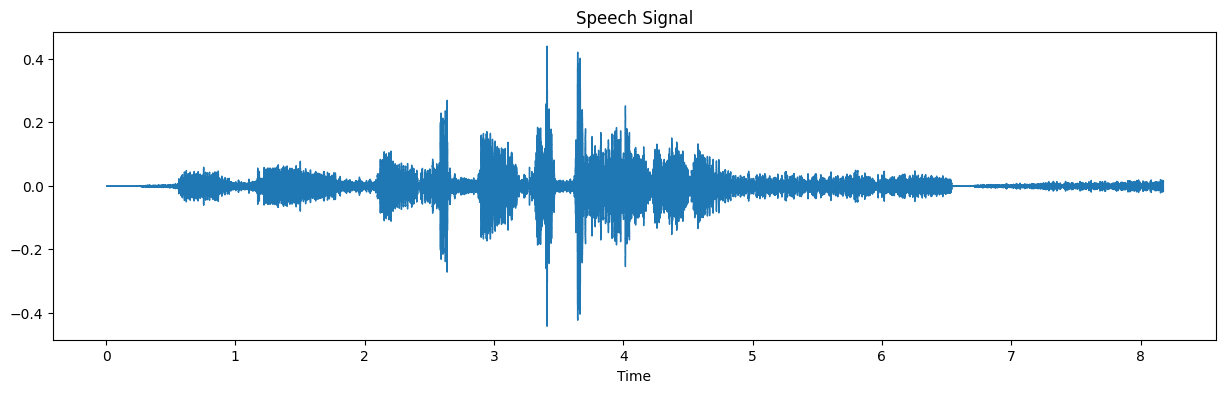

In [6]:
from IPython.display import Audio
y, sr = librosa.load(filename, sr=sample_rate)
plt.figure(figsize=(15, 4))
plt.title('Speech Signal')
librosa.display.waveshow(y)
audio_player = Audio(y, rate=sr)
audio_player

<ipython-input-16-2f01d3f1719e>:29: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Number of features extracted from STFT:  1025


Classified labels: [2 2 2 ... 0 0 0]


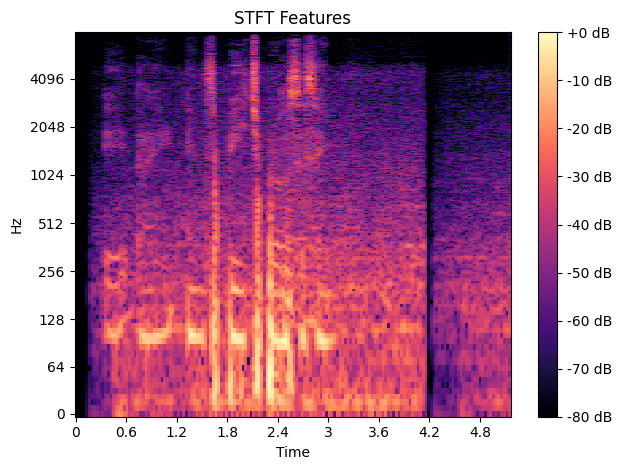

              precision    recall  f1-score   support

           0       1.00      0.35      0.52      1025
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.35      1025
   macro avg       0.33      0.12      0.17      1025
weighted avg       1.00      0.35      0.52      1025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Extract STFT features
def extract_stft_features(y, sr):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    return D

# Train an HMM model
def train_hmm_model(X, n_components):
    model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
    model.fit(X)
    return model

# Classify the speech signal
def classify_speech_signal(model, X):
    labels = model.predict(X)
    return labels

# Plot the STFT features
def plot_stft_features(D):
    librosa.display.specshow(D, sr=16000, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Features')
    plt.tight_layout()
    plt.show()

# Load the speech signal
y, sr = librosa.load(filename)

# Extract STFT features
features = extract_stft_features(y, sr)

num_features = features.shape[0]  # Number of frequency bins
print("Number of features extracted from STFT: ", num_features)

# Train an HMM model
n_components = 3
model = train_hmm_model(features, n_components)

# Classify the speech signal
labels = classify_speech_signal(model, features)

print("Classified labels:", labels)

# Plot the STFT features
plot_stft_features(features)

print(classification_report(np.zeros_like(labels), labels))


In [11]:
pip install hmmlearn

In [ ]:
pip install pydub